# Stein-Variational Gradient Descent on Gaussian Mixtures

In [4]:
import numpy as np
from python import SVGD
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

## Preparation
First we need an implementation of Gaussian Mixuture that also computes the derivative of its log-probability.

In [2]:
class GaussianMixture:
    def __init__(self, params):
        self.params = params

    def normalPdf(self, x, m, v):
        return np.exp(-0.5 * (x - m)**2 / v**2) / (v * np.sqrt(2 * np.pi))

    def dnormalPdf(self, x, m, v):
        return self.normalPdf(x, m, v) * (-(x - m) / v**2)

    def pdf(self, x):
        return np.sum([ c * self.normalPdf(x, m, v) for c, m, v in self.params], axis = 0)

    def dlnprob(self, x):
        return np.sum([ c * self.dnormalPdf(x, m, v) for c, m, v in self.params], axis = 0) / self.pdf(x)

Then, we'll code a utility function to obtain density estimates from a Kernel Density Estimation:

In [3]:
def kernelDensityEstimation(x):
    kde = KernelDensity(kernel='gaussian').fit(x)
    return lambda y: np.exp(kde.score_samples(y.reshape(-1, 1)))

## Approximating a Gaussian Mixture
We initialize the model with $10$ samples from $\mathcal{N}(x | 10, 1)$ and also directly obtain a KDE-operator:

In [7]:
x0 = x0 = np.random.normal(-10,1, [10, 1])
kde0 = kernelDensityEstimation(x0)

Now we instantiate the Gaussian Mixture and call SVGD. For the mixture we use two components with distribution $\{\frac{1}{3}, \frac{2}{3}\}$ and Gaussians $\mathcal{N}(x | -2, 1)$ and $\mathcal{N}(x | 2, 1)$ respectively (just like in the paper):

In [8]:
gaussianMix = GaussianMixture([(1/3, -2, 1), (2/3, 2, 1)])
finalParticles = SVGD().update(x0, gaussianMix.dlnprob, 1000, 0.1)
kdeFinalParticles = kernelDensityEstimation(finalParticles)

## Visualization
We compare the final estimates with the initial guess and the target distribution:

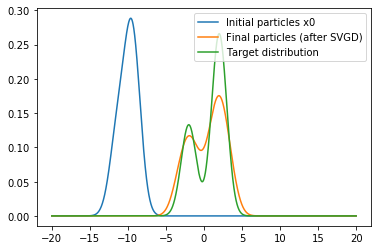

In [9]:
x = np.linspace(-20, 20, 10000)
plt.plot(x, kde0(x), label="Initial particles x0")
plt.plot(x, kdeFinalParticles(x), label="Final particles (after SVGD)")
plt.plot(x, gaussianMix.pdf(x), label="Target distribution")
plt.legend()